# View of Master Flats


- work with Weakly_2023_01
- use jupyter kernel LSST

- author : Sylvie Dagoret-Campagne
- affiliation : IJCLab
- creation date : 2023/03/27
- update date : 2023/03/28



In [1]:
! eups list -s | grep LOCAL

atmospec              LOCAL:/home/d/dagoret/repos/repos_w_2023_01/atmospec 	setup
eups                  LOCAL:/opt/lsst/software/stack/conda/miniconda3-py38_4.9.2/envs/lsst-scipipe-5.1.0/eups 	setup
spectractor           LOCAL:/home/d/dagoret/repos/repos_w_2023_01/Spectractor 	setup


In [2]:
! echo $IMAGE_DESCRIPTION
! eups list -s lsst_distrib

Weekly 2023_08
   gdf42428520+785af55281 	current w_2023_08 setup


In [3]:
import os,re
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd
%matplotlib inline
from matplotlib.colors import LogNorm

from mpl_toolkits.axes_grid1 import make_axes_locatable

import matplotlib.ticker                         # here's where the formatter is
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)

from astropy.io import fits
from astropy.time import Time

In [4]:
# LSST Display
import lsst.afw.display as afwDisplay
afwDisplay.setDefaultBackend('matplotlib')

In [5]:
# Butler
import lsst.daf.butler as dafButler
from lsst.daf.butler import CollectionType

In [6]:
#repo = "/sdf/group/rubin/repo/main"
repo="/sdf/group/rubin/repo/oga/"
butler = dafButler.Butler(repo)
registry = butler.registry

In [7]:
# Assembly task
# https://github.com/lsst/ip_isr/blob/main/python/lsst/ip/isr/isrTask.py

from lsst.ip.isr.assembleCcdTask import (AssembleCcdConfig, AssembleCcdTask)
from lsst.ip.isr.isrTask import (IsrTask, IsrTaskConfig)

## Make list of official calibration collections
- https://pipelines.lsst.io/middleware/faq.html

In [8]:
calibrun_collections = list(
    butler.registry.queryCollections(
        re.compile("LATISS/calib/.+"),
        collectionTypes={CollectionType.RUN},
    )
)

In [9]:
calibrun_collections

['LATISS/calib/DM-28636/curated/19700101T000000Z',
 'LATISS/calib/DM-28636/curated/20180101T000000Z',
 'LATISS/calib/DM-28636/unbounded',
 'LATISS/calib/DM-36484/biasGen.20221005a/20221006T000101Z',
 'LATISS/calib/DM-36484/verifyBias.20221005a/20221006T000747Z',
 'LATISS/calib/DM-36484/verifyBias.20221005a/20221006T213237Z',
 'LATISS/calib/DM-36484/darkGen.20221005a/20221006T222501Z',
 'LATISS/calib/DM-36484/darkGen.20221006a/20221006T222921Z',
 'LATISS/calib/DM-36484/verifyDark.20221006a/20221006T224403Z',
 'LATISS/calib/DM-36484/flatGen-SDSSr.20221006a/20221006T233657Z',
 'LATISS/calib/DM-36484/verifyFlat-SDSSr.20221006a/20221006T234341Z',
 'LATISS/calib/DM-36484/flatGen-SDSSg.20221006a/20221007T002703Z',
 'LATISS/calib/DM-36484/verifyFlat-SDSSg.20221006a/20221007T003418Z',
 'LATISS/calib/DM-36484/flatGen-SDSSi.20221006a/20221007T003732Z',
 'LATISS/calib/DM-36484/verifyFlat-SDSSi.20221006a/20221007T004423Z',
 'LATISS/calib/DM-36484/flatGen-SDSSiD.20221006a/20221007T004708Z',
 'LATISS

- from the above list one see the available flats

- flatGen-SDSSr.20221006a
- flatGen-SDSSg.20221006a
- flatGen-SDSSi.20221006a
- flatGen-SDSSiD.20221006a
- flatGen-SDSSr.20221107a
- flatGen-SDSSg.20221107a
- flatGen-SDSSi.20221107a
- flatGen-BG40.20230113a
- flatGen-OG550.20230113b
- flatGen-SDSSr.20230113c







## List of Exposures from raw

In [10]:
df_exposure = pd.DataFrame(columns=['id', 'obs_id','day_obs', 'seq_num','time_start','time_end' ,'type', 'target','filter','zenith_angle','expos','ra','dec','skyangle','science_program','jd','mjd'])

In [11]:
for count, info in enumerate(registry.queryDimensionRecords('exposure',where= "instrument='LATISS'")):
    
    df_exposure.loc[count] = [info.id, info.obs_id, info.day_obs, info.seq_num,pd.to_datetime(info.timespan.begin.to_string()),pd.to_datetime(info.timespan.end.to_string()) ,info.observation_type, info.target_name, info.physical_filter, info.zenith_angle, \
                             info.exposure_time,info.tracking_ra, info.tracking_dec, info.sky_angle, info.science_program,
                             info.timespan.begin.jd,info.timespan.begin.mjd ]
    
    if count < 2:
        print("-----------------------------------------------------",count,"---------------------------------------------------------")
        print(info)
        print("\t id:                  ",info.id)
        print("\t day_obs:             ",info.day_obs)
        print("\t seq_num:             ",info.seq_num)
        print("\t type-of-observation: ",info.observation_type)
        print("\t target:              ",info.target_name)
        
        mjd = Time(info.timespan.begin.to_string()).mjd
        jd = Time(info.timespan.begin.to_string()).jd
        print(mjd,jd)
    

----------------------------------------------------- 0 ---------------------------------------------------------
exposure:
  instrument: 'LATISS'
  id: 2022083100004
  physical_filter: 'unknown~unknown'
  obs_id: 'AT_O_20220831_000004'
  exposure_time: 0.0
  dark_time: 0.0160482
  observation_type: 'bias'
  observation_reason: 'bias'
  day_obs: 20220831
  seq_num: 4
  seq_start: 4
  seq_end: 4
  group_name: '2022083100004'
  group_id: 2022083100004
  target_name: 'UNKNOWN'
  science_program: 'unknown'
  tracking_ra: None
  tracking_dec: None
  sky_angle: None
  azimuth: None
  zenith_angle: None
  has_simulated: False
  timespan: Timespan(begin=astropy.time.Time('2022-08-31 22:58:13.633984', scale='tai', format='iso'), end=astropy.time.Time('2022-08-31 22:58:13.650000', scale='tai', format='iso'))
	 id:                   2022083100004
	 day_obs:              20220831
	 seq_num:              4
	 type-of-observation:  bias
	 target:               UNKNOWN
59822.957102245186 2459823.45710

In [12]:
df_exposure

,id,obs_id,day_obs,seq_num,time_start,time_end,type,target,filter,zenith_angle,expos,ra,dec,skyangle,science_program,jd,mjd
0,2022083100004,AT_O_20220831_000004,20220831,4,2022-08-31 22:58:13.633984,2022-08-31 22:58:13.650,bias,UNKNOWN,unknown~unknown,NaN,0.0,NaN,NaN,NaN,unknown,2.459823e+06,59822.957102
1,2022083100008,AT_O_20220831_000008,20220831,8,2022-08-31 22:59:16.387013,2022-08-31 22:59:16.398,bias,UNKNOWN,unknown~unknown,NaN,0.0,NaN,NaN,NaN,unknown,2.459823e+06,59822.957829
2,2022083100007,AT_O_20220831_000007,20220831,7,2022-08-31 22:59:11.978990,2022-08-31 22:59:11.991,bias,UNKNOWN,unknown~unknown,NaN,0.0,NaN,NaN,NaN,unknown,2.459823e+06,59822.957778
3,2022083100009,AT_O_20220831_000009,20220831,9,2022-08-31 22:59:20.801996,2022-08-31 22:59:20.813,bias,UNKNOWN,unknown~unknown,NaN,0.0,NaN,NaN,NaN,unknown,2.459823e+06,59822.957880
4,2022083100012,AT_O_20220831_000012,20220831,12,2022-08-31 23:00:00.113994,2022-08-31 23:00:03.124,dark,UNKNOWN,unknown~unknown,NaN,3.0,NaN,NaN,NaN,unknown,2.459823e+06,59822.958335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43614,2023032700092,AT_O_20230327_000092,20230327,92,2023-03-28 06:32:01.715990,2023-03-28 06:32:31.729,dark,Park position,empty~empty,None,30.0,None,None,None,unknown,2.460032e+06,60031.272242
43615,2023032700093,AT_O_20230327_000093,20230327,93,2023-03-28 06:32:34.213983,2023-03-28 06:33:04.225,dark,Park position,empty~empty,None,30.0,None,None,None,unknown,2.460032e+06,60031.272618
43616,2023032700094,AT_O_20230327_000094,20230327,94,2023-03-28 06:33:06.713988,2023-03-28 06:33:36.725,dark,Park position,empty~empty,None,30.0,None,None,None,unknown,2.460032e+06,60031.272994
43617,2023032700095,AT_O_20230327_000095,20230327,95,2023-03-28 06:33:39.204015,2023-03-28 06:34:09.215,dark,Park position,empty~empty,None,30.0,None,None,None,unknown,2.460032e+06,60031.273370


In [13]:
df_exposure["type"].unique()

array(['bias', 'dark', 'engtest', 'flat', 'acq', 'cwfs', 'science',
       'unknown', 'test', 'stuttered', 'focus'], dtype=object)

In [14]:
df_raw = df_exposure[df_exposure.type == 'science']

## Selection of flats raw-exposures

In [15]:
df_flat = df_exposure[df_exposure.type == 'flat']

In [16]:
df_flat = df_flat.sort_values(by="day_obs",ascending=True)

In [17]:
df_flat.tail(50)

,id,obs_id,day_obs,seq_num,time_start,time_end,type,target,filter,zenith_angle,expos,ra,dec,skyangle,science_program,jd,mjd
43375,2023032100165,AT_O_20230321_000165,20230321,165,2023-03-21 17:04:23.488989,2023-03-21 17:04:31.125,flat,FlatField position,empty~empty,51.292177,7.4,None,None,None,unknown,2.460025e+06,60024.711383
43386,2023032100176,AT_O_20230321_000176,20230321,176,2023-03-21 17:06:19.822013,2023-03-21 17:06:28.469,flat,FlatField position,empty~empty,51.291839,8.4,None,None,None,unknown,2.460025e+06,60024.712729
43388,2023032100178,AT_O_20230321_000178,20230321,178,2023-03-21 17:06:42.274999,2023-03-21 17:06:51.110,flat,FlatField position,empty~empty,51.291778,8.6,None,None,None,unknown,2.460025e+06,60024.712989
43389,2023032100179,AT_O_20230321_000179,20230321,179,2023-03-21 17:06:53.597006,2023-03-21 17:07:02.648,flat,FlatField position,empty~empty,51.291744,8.8,None,None,None,unknown,2.460025e+06,60024.713120
43390,2023032100180,AT_O_20230321_000180,20230321,180,2023-03-21 17:07:05.134018,2023-03-21 17:07:14.169,flat,FlatField position,empty~empty,51.291706,8.8,None,None,None,unknown,2.460025e+06,60024.713254
43391,2023032100181,AT_O_20230321_000181,20230321,181,2023-03-21 17:07:16.655018,2023-03-21 17:07:25.883,flat,FlatField position,empty~empty,51.291672,9.0,None,None,None,unknown,2.460025e+06,60024.713387
43392,2023032100182,AT_O_20230321_000182,20230321,182,2023-03-21 17:07:28.369981,2023-03-21 17:07:37.615,flat,FlatField position,empty~empty,51.291638,9.0,None,None,None,unknown,2.460025e+06,60024.713523
43393,2023032100183,AT_O_20230321_000183,20230321,183,2023-03-21 17:07:40.099992,2023-03-21 17:07:49.535,flat,FlatField position,empty~empty,51.291607,9.2,None,None,None,unknown,2.460025e+06,60024.713659
43394,2023032100184,AT_O_20230321_000184,20230321,184,2023-03-21 17:07:52.026984,2023-03-21 17:08:01.464,flat,FlatField position,empty~empty,51.291566,9.2,None,None,None,unknown,2.460025e+06,60024.713797
43395,2023032100185,AT_O_20230321_000185,20230321,185,2023-03-21 17:08:03.961017,2023-03-21 17:08:13.591,flat,FlatField position,empty~empty,51.291535,9.4,None,None,None,unknown,2.460025e+06,60024.713935


# List of dates

In [18]:
list_of_dates_flats = df_flat['day_obs'].unique() 
list_of_dates_flats

array([20220902, 20220907, 20220908, 20220912, 20220913, 20220914,
       20220922, 20220923, 20220927, 20220928, 20220929, 20221004,
       20221005, 20221007, 20221011, 20221012, 20221013, 20221025,
       20221026, 20221027, 20221103, 20221104, 20221108, 20221109,
       20221110, 20221122, 20221123, 20221124, 20221209, 20221211,
       20221212, 20230110, 20230112, 20230116, 20230117, 20230118,
       20230119, 20230127, 20230131, 20230201, 20230202, 20230207,
       20230209, 20230214, 20230215, 20230216, 20230301, 20230311,
       20230314, 20230321, 20230327])

# List of filters

In [19]:
list_of_filters = df_flat['filter'].unique()
list_of_filters

array(['unknown~unknown', 'FELH0600~empty', 'SDSSr~empty', 'empty~empty',
       'empty~ronchi170lpmm', 'empty~holo4_003', 'SDSSr_65mm~empty',
       'SDSSi_65mm~empty', 'SDSSg_65mm~empty', 'SDSSi_65mm~holo4_003',
       'OG550_65mm_1~empty', 'BG40_65mm_1~empty',
       'OG550_65mm_1~holo4_003', 'empty~blue300lpmm_qn1'], dtype=object)

# Selection of the date

In [20]:
date_sel = 20230214
filter_sel = 'SDSSg_65mm~empty'

In [21]:
cut_date_flat = df_flat['day_obs'] == date_sel
cut_date_raw = df_raw['day_obs'] ==  date_sel

# Selection of the filter

In [22]:
cut_filter_flat = df_flat['filter'] == filter_sel
cut_filter_raw = df_raw['filter'] ==  filter_sel

In [23]:
for the_date in list_of_dates_flats:
    cut_date = df_flat['day_obs'] == the_date
    cut_combined = cut_date & cut_filter_flat
    
    df_flat_this_date = df_flat[cut_combined]
    
    N = len(df_flat_this_date) 
    if N >0:
        print("=======================================================================")   
        print(f"{the_date} :: N={N}")
        print(df_flat_this_date.id.values)
    

20221005 :: N=61
[2022100500331 2022100500333 2022100500335 2022100500329 2022100500327
 2022100500323 2022100500276 2022100500278 2022100500280 2022100500325
 2022100500282 2022100500284 2022100500288 2022100500300 2022100500302
 2022100500304 2022100500306 2022100500308 2022100500310 2022100500312
 2022100500314 2022100500309 2022100500311 2022100500313 2022100500315
 2022100500316 2022100500318 2022100500320 2022100500322 2022100500324
 2022100500326 2022100500328 2022100500330 2022100500332 2022100500286
 2022100500317 2022100500319 2022100500321 2022100500298 2022100500296
 2022100500334 2022100500307 2022100500294 2022100500292 2022100500275
 2022100500277 2022100500279 2022100500281 2022100500283 2022100500285
 2022100500289 2022100500291 2022100500293 2022100500305 2022100500295
 2022100500297 2022100500299 2022100500301 2022100500290 2022100500303
 2022100500287]
20221007 :: N=6
[2022100700028 2022100700026 2022100700029 2022100700027 2022100700009
 2022100700025]
20221011 :: 

# View

In [24]:
cut_combined_flat = cut_date_flat & cut_filter_flat
cut_combined_raw = cut_date_raw & cut_filter_raw

In [25]:
df_flat_this_date = df_flat[cut_combined_flat]

In [26]:
df_raw_this_date = df_raw[cut_combined_raw]

In [27]:
N = len(df_flat_this_date)
df_flat_this_date = df_flat_this_date.sort_values(by="id").reset_index()

In [28]:
df_flat_this_date 

,index,id,obs_id,day_obs,seq_num,time_start,time_end,type,target,filter,zenith_angle,expos,ra,dec,skyangle,science_program,jd,mjd
0,36012,2023021400056,AT_O_20230214_000056,20230214,56,2023-02-14 20:05:11.739984,2023-02-14 20:05:14.966,flat,FlatField position,SDSSg_65mm~empty,51.27142,3.0,None,None,None,unknown,2.459990e+06,59989.836941
1,36013,2023021400057,AT_O_20230214_000057,20230214,57,2023-02-14 20:05:17.452003,2023-02-14 20:05:20.696,flat,FlatField position,SDSSg_65mm~empty,51.2714,3.0,None,None,None,unknown,2.459990e+06,59989.837008
2,36014,2023021400058,AT_O_20230214_000058,20230214,58,2023-02-14 20:05:23.186995,2023-02-14 20:05:26.413,flat,FlatField position,SDSSg_65mm~empty,51.271376,3.0,None,None,None,unknown,2.459990e+06,59989.837074
3,36015,2023021400059,AT_O_20230214_000059,20230214,59,2023-02-14 20:05:28.898008,2023-02-14 20:05:32.138,flat,FlatField position,SDSSg_65mm~empty,51.271359,3.0,None,None,None,unknown,2.459990e+06,59989.837140
4,36016,2023021400060,AT_O_20230214_000060,20230214,60,2023-02-14 20:05:34.623988,2023-02-14 20:05:37.853,flat,FlatField position,SDSSg_65mm~empty,51.271345,3.0,None,None,None,unknown,2.459990e+06,59989.837206
5,36017,2023021400061,AT_O_20230214_000061,20230214,61,2023-02-14 20:05:40.345019,2023-02-14 20:05:43.584,flat,FlatField position,SDSSg_65mm~empty,51.271321,3.0,None,None,None,unknown,2.459990e+06,59989.837273
6,36018,2023021400062,AT_O_20230214_000062,20230214,62,2023-02-14 20:05:46.069993,2023-02-14 20:05:49.300,flat,FlatField position,SDSSg_65mm~empty,51.271304,3.0,None,None,None,unknown,2.459990e+06,59989.837339
7,36019,2023021400063,AT_O_20230214_000063,20230214,63,2023-02-14 20:05:51.787001,2023-02-14 20:05:55.028,flat,FlatField position,SDSSg_65mm~empty,51.271287,3.0,None,None,None,unknown,2.459990e+06,59989.837405
8,36020,2023021400064,AT_O_20230214_000064,20230214,64,2023-02-14 20:05:57.513987,2023-02-14 20:06:00.747,flat,FlatField position,SDSSg_65mm~empty,51.271267,3.0,None,None,None,unknown,2.459990e+06,59989.837471
9,36021,2023021400065,AT_O_20230214_000065,20230214,65,2023-02-14 20:06:03.232000,2023-02-14 20:06:06.464,flat,FlatField position,SDSSg_65mm~empty,51.271246,3.0,None,None,None,unknown,2.459990e+06,59989.837537


In [29]:
df_raw_this_date 

,id,obs_id,day_obs,seq_num,time_start,time_end,type,target,filter,zenith_angle,expos,ra,dec,skyangle,science_program,jd,mjd
36301,2023021400335,AT_O_20230214_000335,20230214,335,2023-02-15 01:03:19.742013,2023-02-15 01:03:49.974,science,SDSS-J081508_012,SDSSg_65mm~empty,49.680789,30.0,123.692013,7.247366,180.008163,AUXTEL_DRP_IMAGING,2.459991e+06,59990.043978
36302,2023021400336,AT_O_20230214_000336,20230214,336,2023-02-15 01:03:52.448012,2023-02-15 01:04:22.677,science,SDSS-J081508_012,SDSSg_65mm~empty,49.594288,30.0,123.692023,7.247395,180.008313,AUXTEL_DRP_IMAGING,2.459991e+06,59990.044357
36383,2023021400425,AT_O_20230214_000425,20230214,425,2023-02-15 02:42:45.660006,2023-02-15 02:43:15.893,science,SPT-CL-J0559-5249_054,SDSSg_65mm~empty,28.695255,30.0,90.080321,-52.63783,0.001454,AUXTEL_DRP_IMAGING,2.459991e+06,59990.113028
36384,2023021400426,AT_O_20230214_000426,20230214,426,2023-02-15 02:43:18.369987,2023-02-15 02:43:48.598,science,SPT-CL-J0559-5249_054,SDSSg_65mm~empty,28.757935,30.0,90.080316,-52.637859,0.001426,AUXTEL_DRP_IMAGING,2.459991e+06,59990.113407
36392,2023021400434,AT_O_20230214_000434,20230214,434,2023-02-15 02:49:08.369014,2023-02-15 02:49:38.606,science,SPT-CL-J0559-5249_062,SDSSg_65mm~empty,29.374606,30.0,90.079943,-52.543846,0.00199,AUXTEL_DRP_IMAGING,2.459991e+06,59990.117458
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36667,2023021400708,AT_O_20230214_000708,20230214,708,2023-02-15 05:52:17.709005,2023-02-15 05:52:47.948,science,E5-A_035,SDSSg_65mm~empty,21.062757,30.0,180.73008,-45.500022,359.998483,AUXTEL_DRP_IMAGING,2.459991e+06,59990.244649
36672,2023021400713,AT_O_20230214_000713,20230214,713,2023-02-15 05:55:38.928996,2023-02-15 05:56:09.173,science,E5-A_036,SDSSg_65mm~empty,20.68806,30.0,180.865133,-45.500012,359.998431,AUXTEL_DRP_IMAGING,2.459991e+06,59990.246978
36673,2023021400714,AT_O_20230214_000714,20230214,714,2023-02-15 05:56:11.648996,2023-02-15 05:56:41.885,science,E5-A_036,SDSSg_65mm~empty,20.615571,30.0,180.865037,-45.499956,359.998443,AUXTEL_DRP_IMAGING,2.459991e+06,59990.247357
36678,2023021400719,AT_O_20230214_000719,20230214,719,2023-02-15 05:59:33.177011,2023-02-15 06:00:03.413,science,E5-A_037,SDSSg_65mm~empty,20.250334,30.0,181.000202,-45.499981,359.998366,AUXTEL_DRP_IMAGING,2.459991e+06,59990.249690


In [30]:
N=len(df_raw_this_date)
N

100

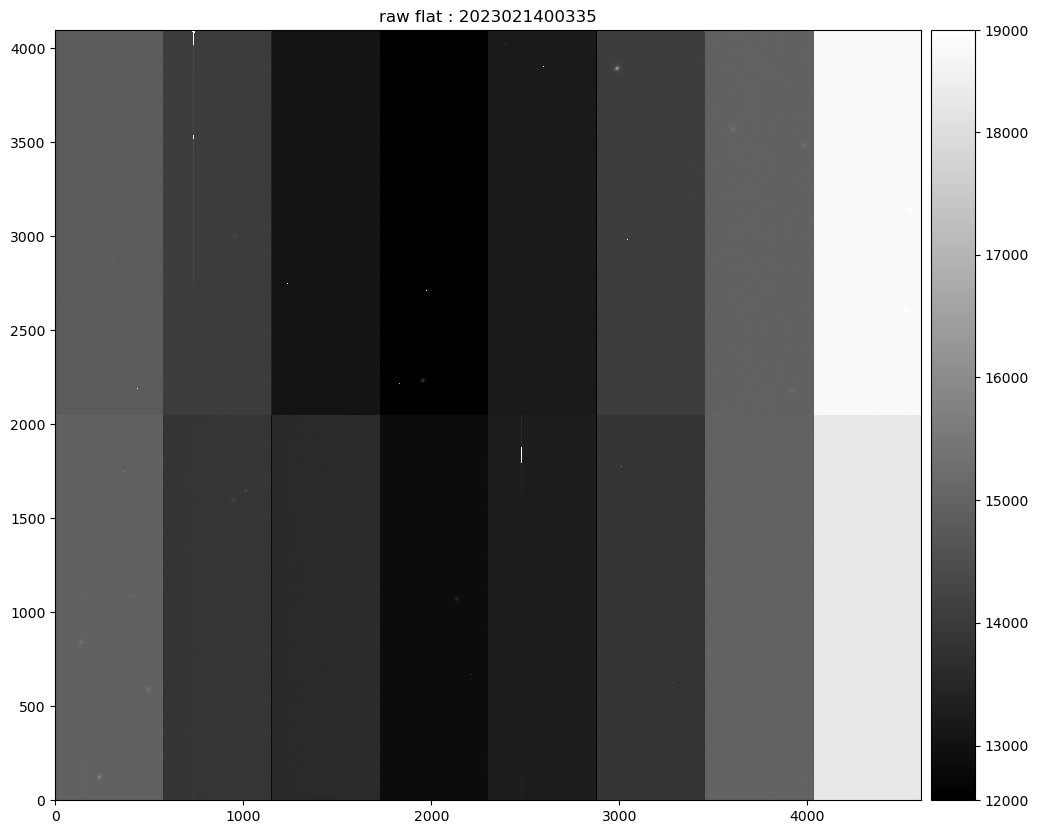

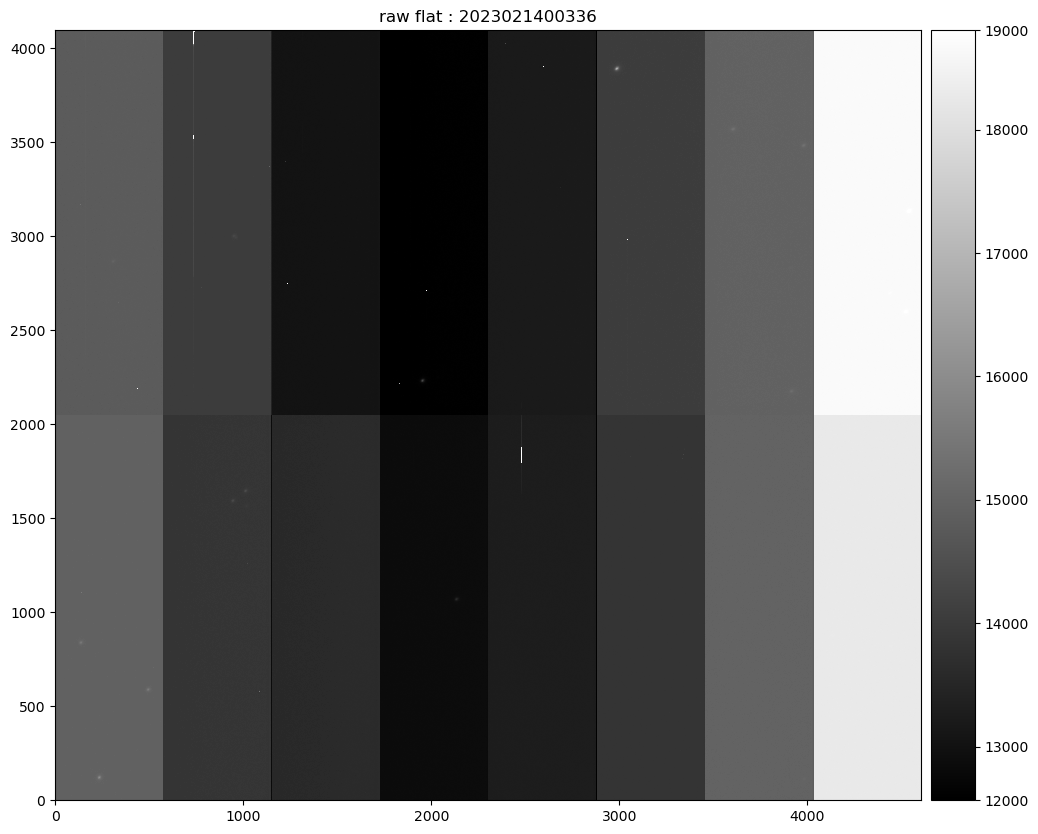

In [31]:
collection='LATISS/raw/all'

# loop on exposures
for idx in range(2):
    exposure_selected=df_raw_this_date.iloc[idx].id 
    
   
    raw_img = butler.get('raw', dataId={'exposure': exposure_selected, 'instrument': 'LATISS', 'detector': 0}, collections = collection)

    fig = plt.figure(figsize=(12,10))
    afw_display = afwDisplay.Display(frame=fig)
    afw_display.scale('linear', 'zscale',None)
    title = f"raw flat : {exposure_selected}"
    afw_display.mtv(raw_img.image,title=title)
    #plt.gca().axis('off')
    

## Assembly task
- examples here : 
https://github.com/lsst/ip_isr/blob/main/tests/test_assembleCcd.py

In [32]:
ass_config = AssembleCcdConfig(doTrim=True,keysToRemove=['SHEEP', 'MONKEYS', 'ZSHEEP'])
ass_task = AssembleCcdTask(config=ass_config)

In [ ]:
collection='LATISS/raw/all'

# loop on exposures
for idx in range(N):
    exposure_selected=df_raw_this_date.iloc[idx].id 
    
   
    raw_img = butler.get('raw', dataId={'exposure': exposure_selected, 'instrument': 'LATISS', 'detector': 0}, collections = collection)
    ass_img = ass_task.assembleCcd(raw_img)

    fig = plt.figure(figsize=(12,10))
    afw_display = afwDisplay.Display(frame=fig)
    afw_display.scale('linear', 'zscale',None)
    title = f"raw flat : {exposure_selected}"
    afw_display.mtv(ass_img.image,title=title)
    #plt.gca().axis('off')
    

/tmp/ipykernel_33732/1454056092.py:11: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure(figsize=(12,10))


# Select One Flat

https://github.com/lsst/cp_pipe/blob/main/python/lsst/cp/pipe/cpFlatNormTask.py

In [ ]:
idx_sel= 0
exposure_selected=df_flat_this_date.iloc[idx_sel].id     
raw_img = butler.get('raw', dataId={'exposure': exposure_selected, 'instrument': 'LATISS', 'detector': 0}, collections = collection)
ass_img = ass_task.assembleCcd(raw_img)

In [ ]:
for ampIdx, amp in enumerate(ass_img.getDetector()):
    ampName = amp.getName()
    # This can work only on postISRCCD
    ampExp = ass_img.Factory(ass_img, amp.getBBox())
    
    fig = plt.figure(figsize=(5,10))
    afw_display = afwDisplay.Display(frame=fig)
    afw_display.scale('linear', 'zscale',None)
    title = f"raw flat : {exposure_selected}, ampl = {ampName}"
    afw_display.mtv(ampExp.image,title=title)

# Perform ISR on the Flat Exposure

- overscan
- defect
- bias

In [ ]:
for c in sorted(registry.queryCollections()):
    if "calib" in c:
        print(c)

In [ ]:
# configuration
isr_config =  IsrTaskConfig()

In [ ]:
isr_config.doDark = False
isr_config.doFlat =  False
isr_config.doFringe = False
isr_config.doDefect = True
isr_config.doLinearize = False
isr_config.doCrosstalk =  False
isr_config.doSaturationInterpolation = False
isr_config.overscan.fitType: 'MEDIAN_PER_ROW'
isr_config.doBias: True

In [ ]:
isr_task = IsrTask(config=isr_config)

In [ ]:
calibType = 'bias'
physical_filter = 'empty~empty'
cameraName = 'LATISS'
# Collection name containing the verification outputs.
calibCollections = ['LATISS/calib','LATISS/raw/all',\
'LATISS/calib/DM-28636',\
'LATISS/calib/DM-28636/curated/19700101T000000Z',\
'LATISS/calib/DM-28636/curated/20180101T000000Z',\
'LATISS/calib/DM-28636/unbounded',\
'LATISS/calib/DM-33875',\
'LATISS/calib/DM-36484/bias.20221005a',\
'LATISS/calib/DM-36484/biasGen.20221005a',\
'LATISS/calib/DM-36484/biasGen.20221005a/20221006T000101Z',\
'LATISS/calib/DM-36484/dark.20221006a',\
'LATISS/calib/DM-36484/darkGen.20221005a',\
'LATISS/calib/DM-36484/darkGen.20221005a/20221006T222501Z',\
'LATISS/calib/DM-36484/darkGen.20221006a',\
'LATISS/calib/DM-36484/darkGen.20221006a/20221006T222921Z',\
'LATISS/calib/DM-36484/flat-SDSSg.20221006a',\
'LATISS/calib/DM-36484/flat-SDSSi.20221006a',\
'LATISS/calib/DM-36484/flat-SDSSr.20221006a',\
'LATISS/calib/DM-36484/flatGen-SDSSg.20221006a',\
'LATISS/calib/DM-36484/flatGen-SDSSg.20221006a/20221007T002703Z',\
'LATISS/calib/DM-36484/flatGen-SDSSi.20221006a',\
'LATISS/calib/DM-36484/flatGen-SDSSi.20221006a/20221007T003732Z',\
'LATISS/calib/DM-36484/flatGen-SDSSiD.20221006a',\
'LATISS/calib/DM-36484/flatGen-SDSSiD.20221006a/20221007T004708Z',\
'LATISS/calib/DM-36484/flatGen-SDSSr.20221006a',\
'LATISS/calib/DM-36484/flatGen-SDSSr.20221006a/20221006T233657Z',\
'LATISS/calib/DM-36484/verifyBias.20221005a',\
'LATISS/calib/DM-36484/verifyBias.20221005a/20221006T000747Z',\
'LATISS/calib/DM-36484/verifyBias.20221005a/20221006T213237Z',\
'LATISS/calib/DM-36484/verifyBias.20221005b',\
'LATISS/calib/DM-36484/verifyBias.20221005b/20221019T205236Z',\
'LATISS/calib/DM-36484/verifyDark.20221006a',\
'LATISS/calib/DM-36484/verifyDark.20221006a/20221006T224403Z',\
'LATISS/calib/DM-36484/verifyFlat-SDSSg.20221006a',\
'LATISS/calib/DM-36484/verifyFlat-SDSSg.20221006a/20221007T003418Z',\
'LATISS/calib/DM-36484/verifyFlat-SDSSi.20221006a',\
'LATISS/calib/DM-36484/verifyFlat-SDSSi.20221006a/20221007T004423Z',\
'LATISS/calib/DM-36484/verifyFlat-SDSSr.20221006a',\
'LATISS/calib/DM-36484/verifyFlat-SDSSr.20221006a/20221006T234341Z',\
'LATISS/calib/DM-36719',\
'LATISS/calib/DM-36719/bias.20221107',\
'LATISS/calib/DM-36719/biasGen.20221107a',\
'LATISS/calib/DM-36719/biasGen.20221107a/20221107T205127Z',\
'LATISS/calib/DM-36719/biasGen.20221107b',\
'LATISS/calib/DM-36719/biasGen.20221107b/20221107T213306Z',\
'LATISS/calib/DM-36719/dark.20221107',\
'LATISS/calib/DM-36719/darkGen.20221107a',\
'LATISS/calib/DM-36719/darkGen.20221107a/20221107T223409Z',\
'LATISS/calib/DM-36719/flat-SDSSg.20221107',\
'LATISS/calib/DM-36719/flat-SDSSi.20221107',\
'LATISS/calib/DM-36719/flat-SDSSr.20221107',\
'LATISS/calib/DM-36719/flatGen-SDSSg.20221107a',\
'LATISS/calib/DM-36719/flatGen-SDSSg.20221107a/20221108T002737Z',\
'LATISS/calib/DM-36719/flatGen-SDSSi.20221107a',\
'LATISS/calib/DM-36719/flatGen-SDSSi.20221107a/20221108T005202Z',\
'LATISS/calib/DM-36719/flatGen-SDSSr.20221107a',\
'LATISS/calib/DM-36719/flatGen-SDSSr.20221107a/20221107T235401Z',\
'LATISS/calib/DM-36719/ptcGen-SDSSr.20221107a',\
'LATISS/calib/DM-36719/ptcGen-SDSSr.20221107a/20221108T180421Z',\
'LATISS/calib/DM-36719/verifyBias.20221107b',\
'LATISS/calib/DM-36719/verifyBias.20221107b/20221107T220410Z',\
'LATISS/calib/DM-36719/verifyDark.20221107a',\
'LATISS/calib/DM-36719/verifyDark.20221107a/20221107T232823Z',\
'LATISS/calib/DM-36719/verifyFlat-SDSSg.20221107a',\
'LATISS/calib/DM-36719/verifyFlat-SDSSg.20221107a/20221108T004225Z',\
'LATISS/calib/DM-36719/verifyFlat-SDSSi.20221107a',\
'LATISS/calib/DM-36719/verifyFlat-SDSSi.20221107a/20221108T012110Z',\
'LATISS/calib/DM-36719/verifyFlat-SDSSi.20221107a/20221108T014950Z',\
'LATISS/calib/DM-36719/verifyFlat-SDSSr.20221107a',\
'LATISS/calib/DM-36719/verifyFlat-SDSSr.20221107a/20221108T000940Z',\
'LATISS/calib/DM-37587/flat-BG40.20230113a',\
'LATISS/calib/DM-37587/flat-OG550.20230113a',\
'LATISS/calib/DM-37587/flat-SDSSr.20230113a',\
'LATISS/calib/DM-37587/flatGen-BG40.20230113a',\
'LATISS/calib/DM-37587/flatGen-BG40.20230113a/20230113T211456Z',\
'LATISS/calib/DM-37587/flatGen-OG550.20230113b',\
'LATISS/calib/DM-37587/flatGen-OG550.20230113b/20230113T213305Z',\
'LATISS/calib/DM-37587/flatGen-SDSSr.20230113c',\
'LATISS/calib/DM-37587/flatGen-SDSSr.20230113c/20230113T214159Z',\
'LATISS/calib/DM-37587/verifyFlat-BG40.20230113a',\
'LATISS/calib/DM-37587/verifyFlat-BG40.20230113a/20230113T212641Z',\
'LATISS/calib/DM-37587/verifyFlat-OG550.20230113b',\
'LATISS/calib/DM-37587/verifyFlat-OG550.20230113b/20230113T213804Z',\
'LATISS/calib/DM-37587/verifyFlat-SDSSr.20230113c',\
'LATISS/calib/DM-37587/verifyFlat-SDSSr.20230113c/20230113T220628Z',\
'LATISS/calib/unbounded',\
'LSSTCam/calib/DM-36442/bias.20221026a',\
'LSSTCam/calib/DM-36442/bias.20221026b',\
'LSSTCam/calib/DM-36442/dark.20221026a',\
'LSSTCam/calib/DM-36442/dark.20221026b',\
'LSSTCam/calib/DM-36442/defects.20221026a',\
'LSSTCam/calib/DM-36442/defects.20221026b',\
'LSSTCam/calib/DM-36442/flat.20221026a',\
'LSSTCam/calib/DM-36442/flat.20221026b',\
'LSSTCam/calib/DM-36442/linearity.20221026a',\
'LSSTCam/calib/DM-36442/linearity.20221026b',\
'LSSTComCam/calib',\
'LSSTComCam/calib/DM-28636',\
'LSSTComCam/calib/DM-28636/unbounded',\
'LSSTComCam/calib/DM-33657',\
'LSSTComCam/calib/unbounded',\
'u/calib/DM-32209-20211013a-felh',\
'u/calib/DM-32209-20211013a-g',\
'u/czw/DM-28920/calib/bias.20210720',\
'u/czw/DM-28920/calib/dark.20210720a',\
'u/czw/DM-28920/calib/defect.20210720a',\
'u/czw/DM-28920/calib/flat.20210720',\
'u/czw/DM-37811/parOStest.20230201a/calib',\
'u/czw/DM-37811/parOStest.20230201a/calib/bias.20230201a',\
'u/czw/DM-37811/parOStest.20230201a/calib/dark.20230201b',\
'u/czw/DM-37811/parOStest.20230201a/calib/flat-SDSSi.20230201c',\
'u/czw/DM-37811/parOStest.20230202a/calib',\
'u/czw/DM-37811/parOStest.20230202a/calib/bias.20230202a',\
'u/czw/DM-37811/parOStest.20230202a/calib/dark.20230202a',\
'u/czw/DM-37811/parOStest.20230202a/calib/flat-BG40.20230207a',\
'u/czw/DM-37811/parOStest.20230202a/calib/flat-OG550.20230207a',\
'u/czw/DM-37811/parOStest.20230202a/calib/flat-SDSSg.20230203a',\
'u/czw/DM-37811/parOStest.20230202a/calib/flat-SDSSi.20230202a',\
'u/czw/DM-37811/parOStest.20230202a/calib/flat-SDSSr.20230203a',\
'u/czw/DM-38434/linearized/calib',\
'u/czw/DM-38434/linearized/calib/bias.20230324a',\
'u/czw/DM-38434/linearized/calib/dark.20230324a',\
'u/czw/DM-38434/linearized/calib/flat-SDSSr.20230324a',\
'u/czw/DM-38434/linearized/calib/linearity.',\
'u/czw/calibX.20220608']

In [ ]:
butler = dafButler.Butler(repo, collections=calibCollections)
camera = butler.get('camera', instrument=cameraName)
bias = butler.get('bias',instrument=cameraName,detector=0)
defects = butler.get('defects',instrument=cameraName,detector=0)

In [ ]:
fig = plt.figure(figsize=(12,10))
afw_display = afwDisplay.Display(frame=fig)
afw_display.scale('linear', 'zscale',None)
title = f"Master bias "
afw_display.mtv(bias.image,title=title)

### Perform  ISR on one raw Flat exposure

In [ ]:
isr_img = isr_task.run(raw_img,bias=bias,defects=defects)

In [ ]:
fig = plt.figure(figsize=(12,10))
afw_display = afwDisplay.Display(frame=fig)
afw_display.scale('linear', 'zscale',None)
title = f"unbiased flat : {exposure_selected}"
afw_display.mtv(isr_img.exposure.image,title=title)

### View each individual exposures

In [ ]:
for ampIdx, amp in enumerate(isr_img.exposure.getDetector()):
    ampName = amp.getName()
    # This can work only on postISRCCD
    ampExp = isr_img.exposure.Factory(isr_img.exposure, amp.getBBox())
    
    fig = plt.figure(figsize=(5,10))
    afw_display = afwDisplay.Display(frame=fig)
    afw_display.scale('linear', 'zscale',None)
    title = f"unbiased flat : {exposure_selected}, ampl = {ampName}"
    afw_display.mtv(ampExp.image,title=title)